## Example validation set inferences (Don't run these cells) 

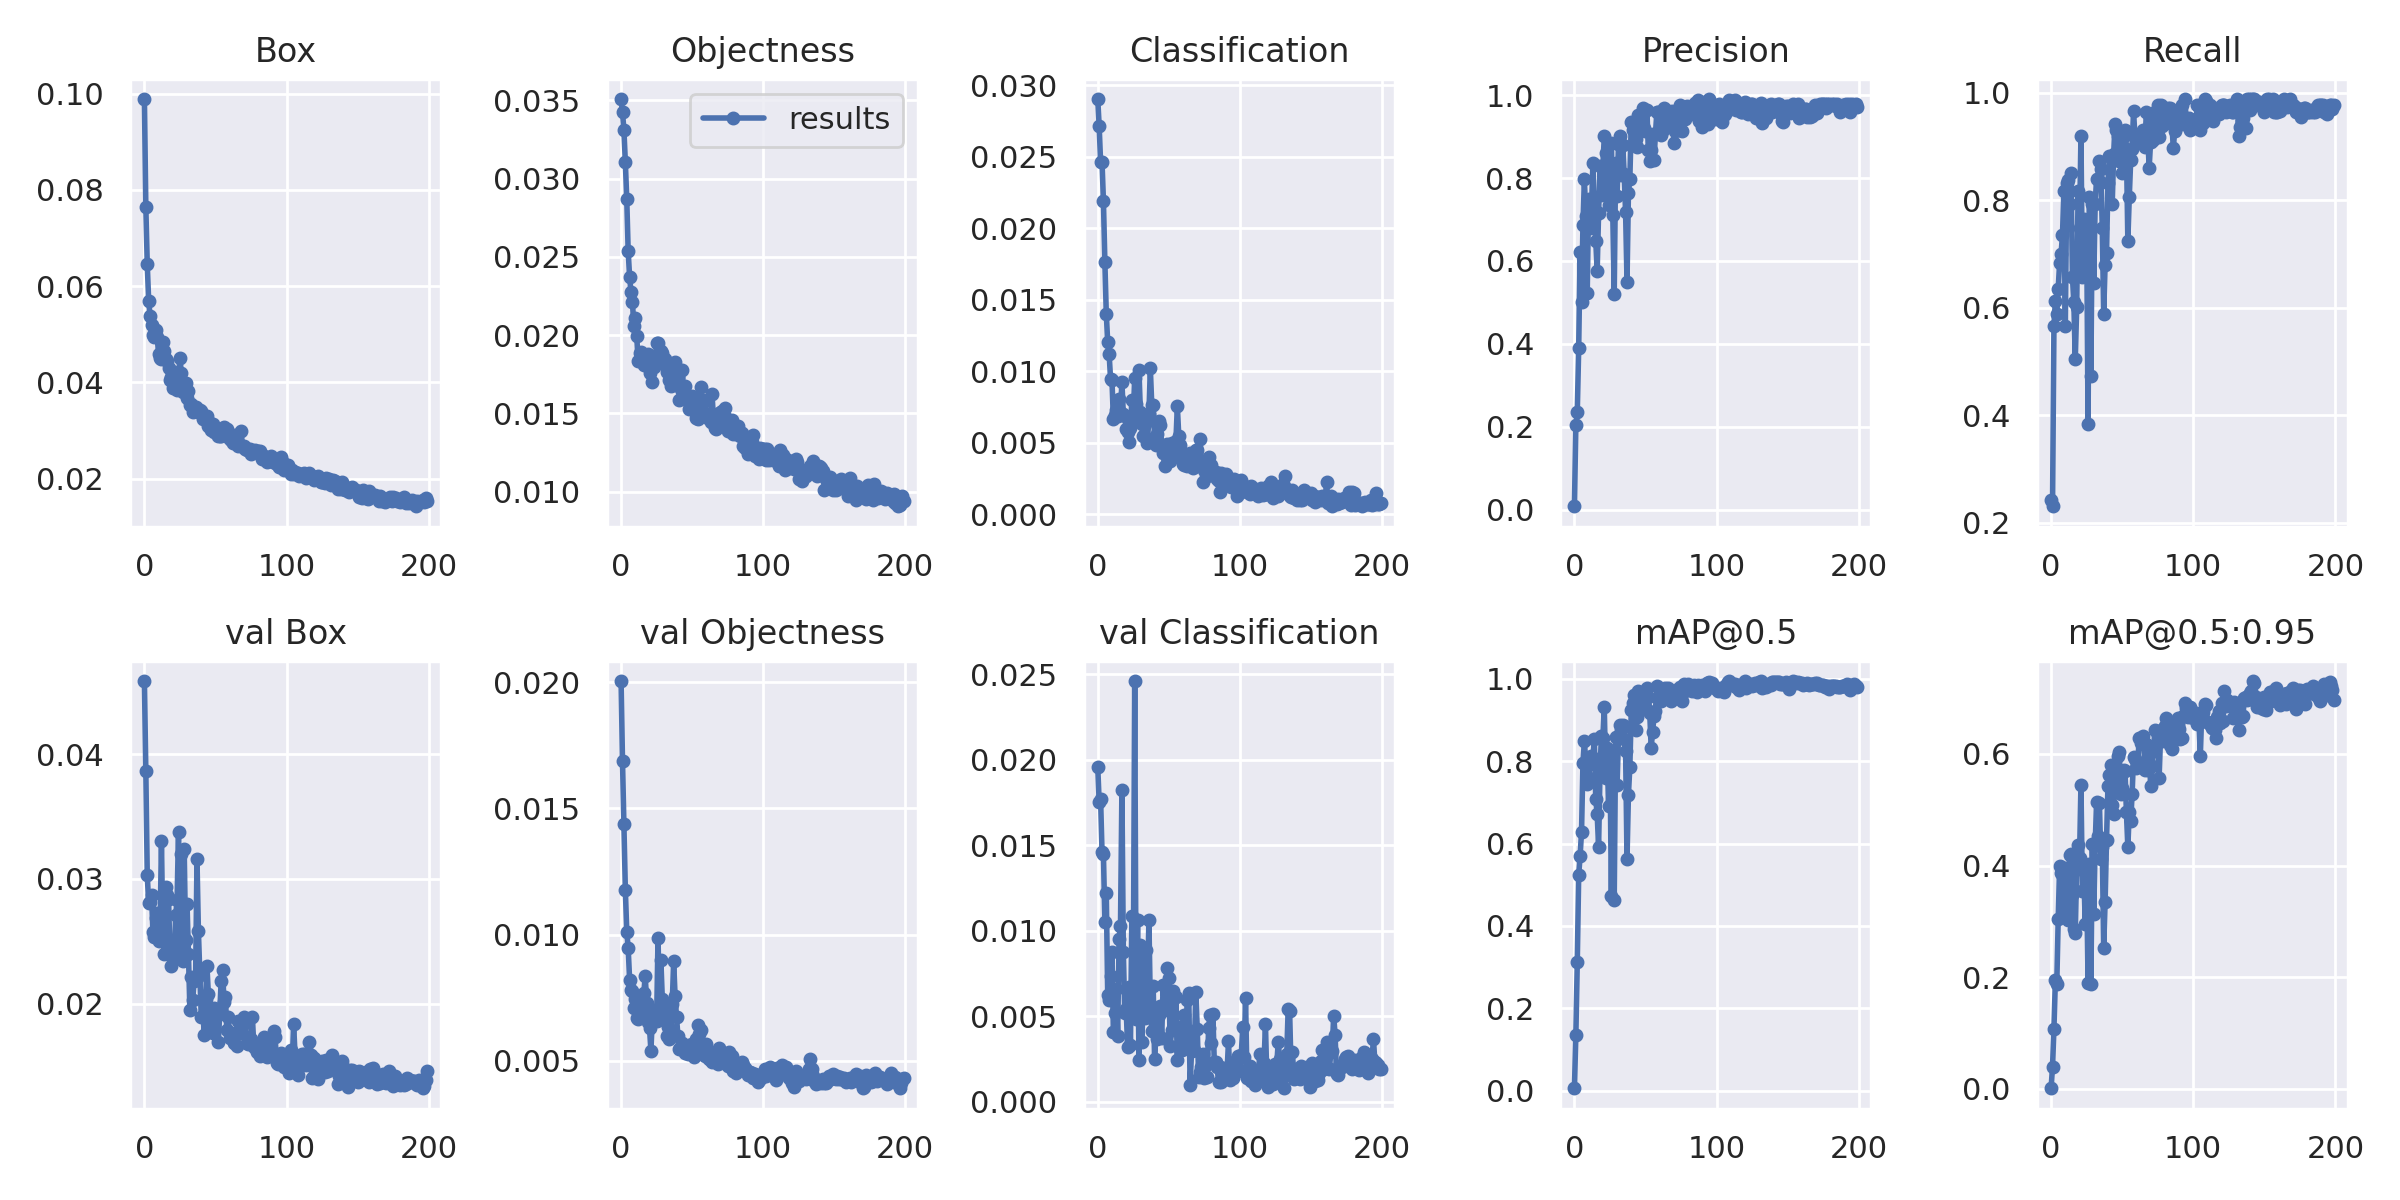

In [ ]:
from utils.plots import plot_results 
Image(filename='/content/yolov5/runs/train/exp2/results.png', width=800)

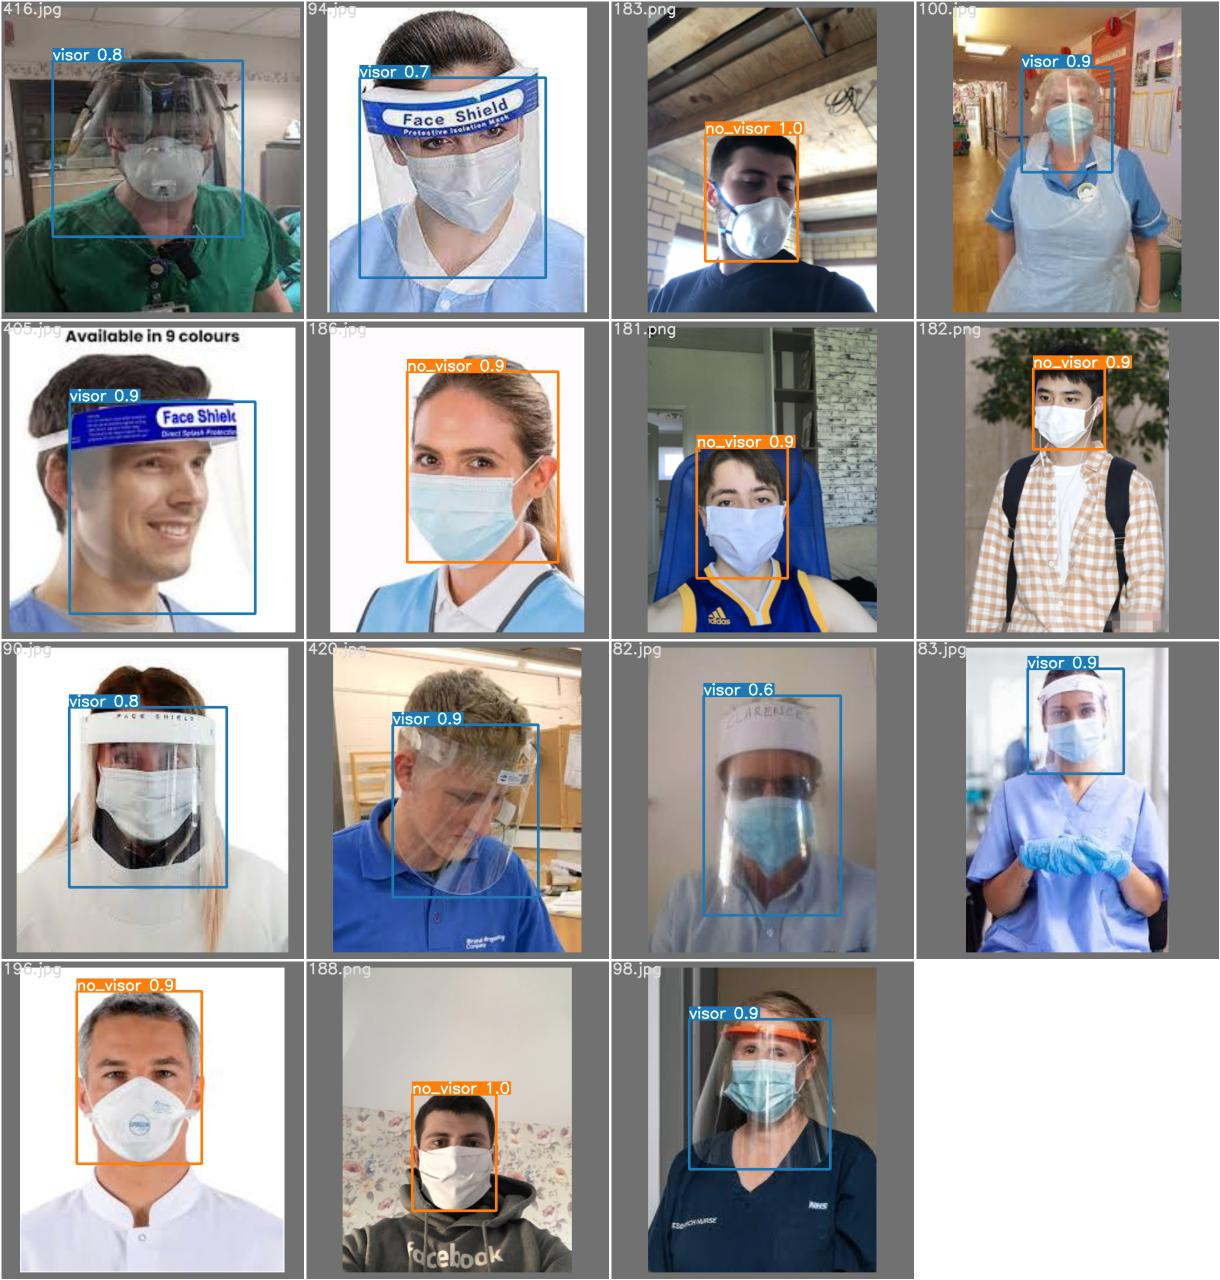

In [ ]:
Image(filename='/content/yolov5/runs/train/exp2/test_batch2_pred.jpg', width=800)

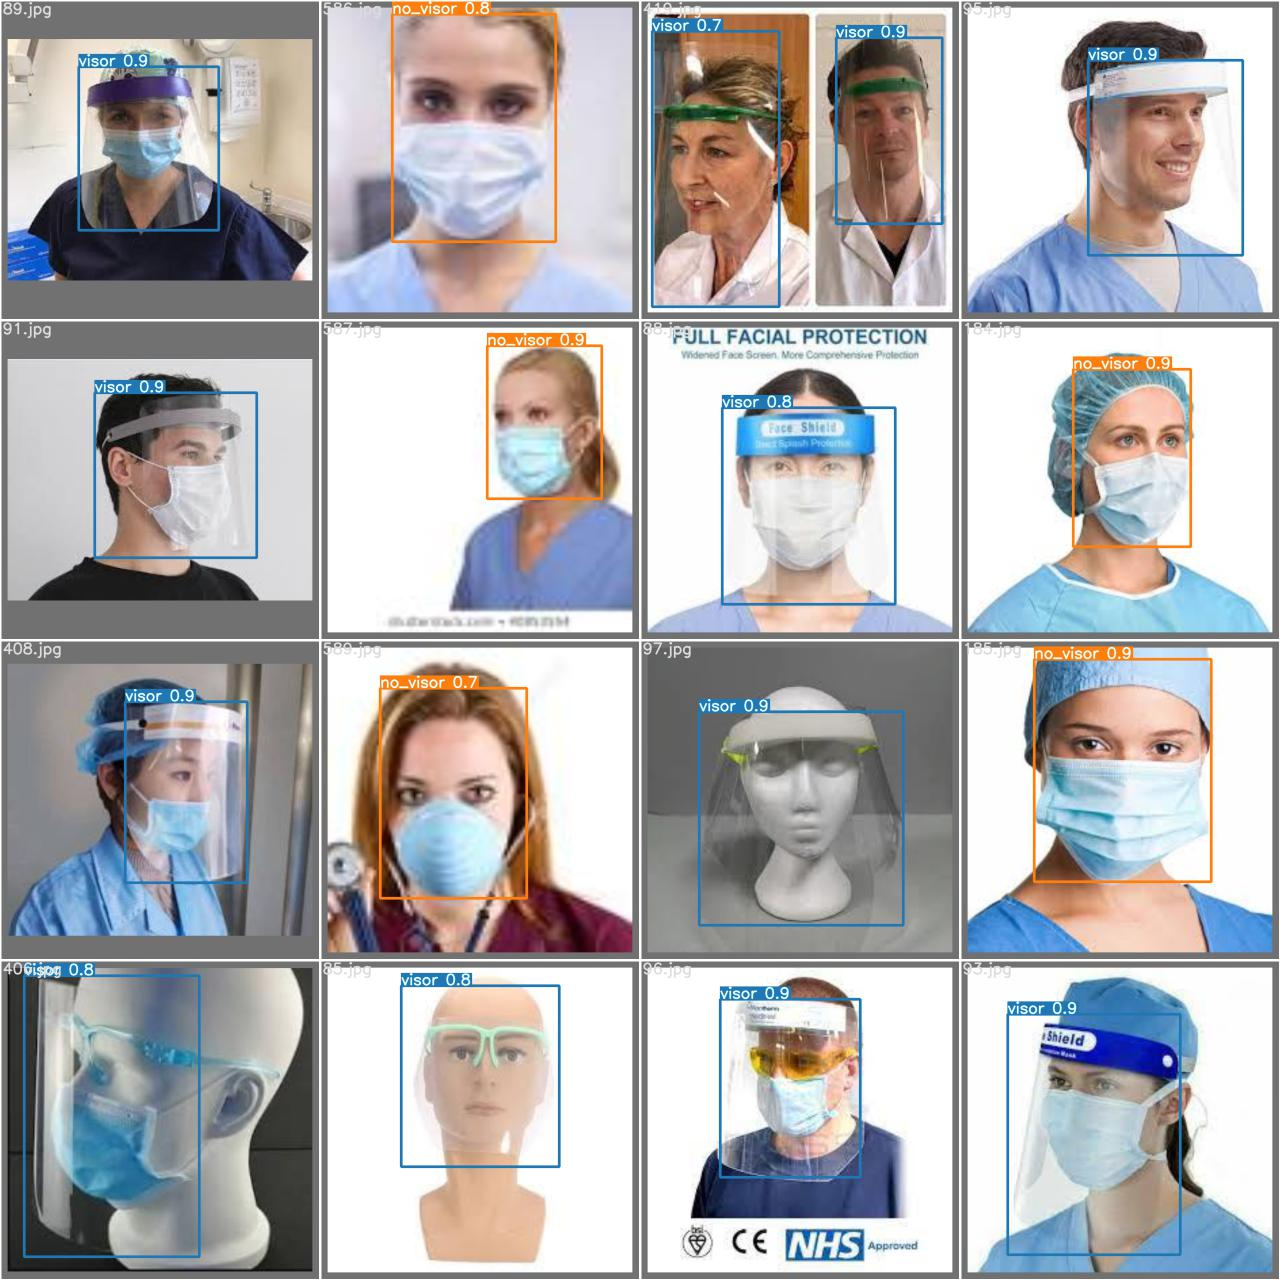

In [ ]:
Image(filename='/content/yolov5/runs/train/exp2/test_batch1_pred.jpg', width=800)

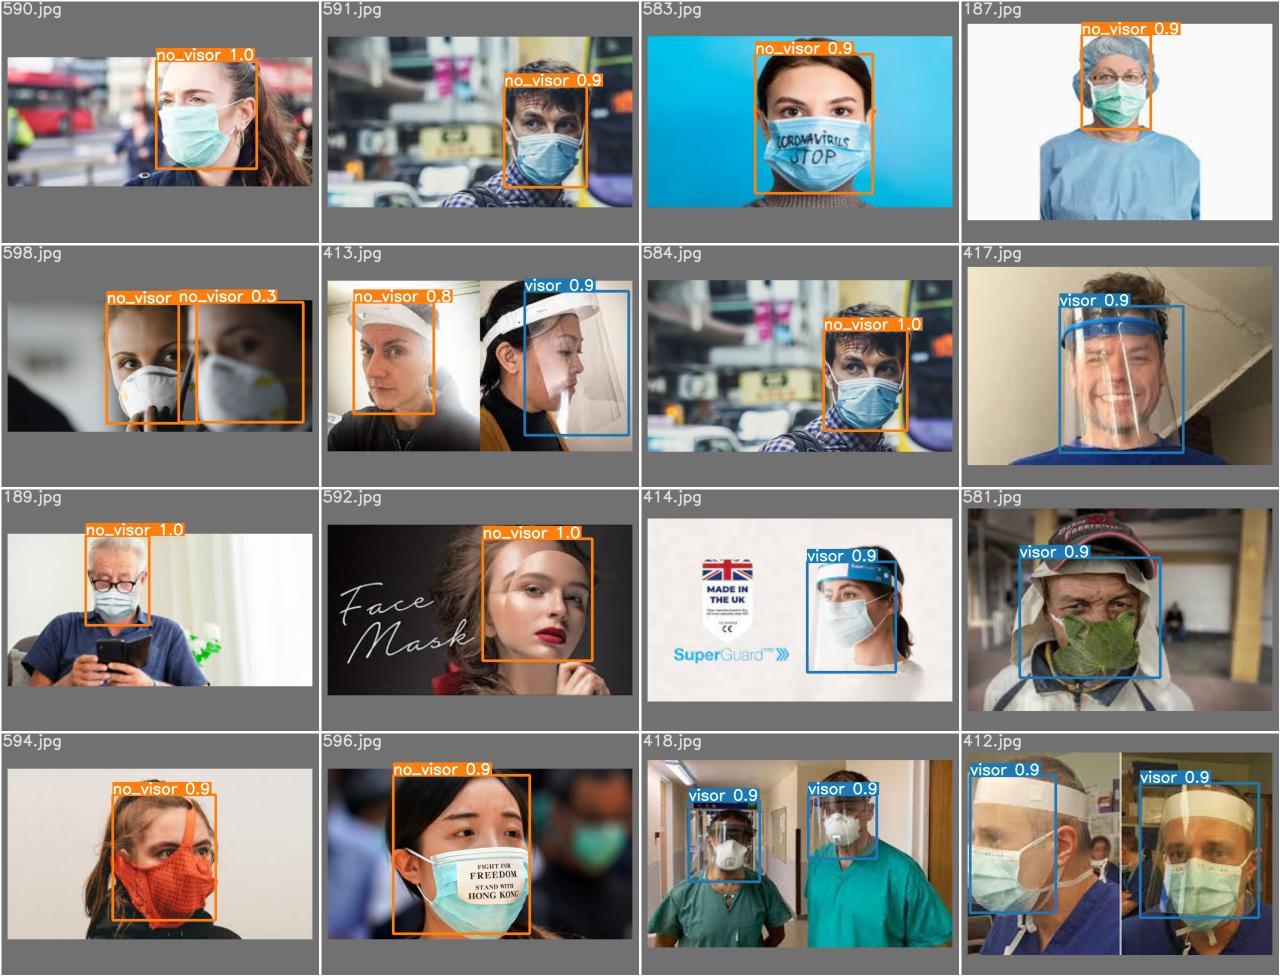

In [ ]:
Image(filename='/content/yolov5/runs/train/exp2/test_batch0_pred.jpg', width=800)  # train batch 0 mosaics and labels

## The code below takes an image from webcam and makes an inference

In [1]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [11]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies
import torch
from IPython.display import Image, clear_output  # to display images
clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.8.1+cu101 (Tesla T4)


In [5]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [6]:
image_file = take_photo()

<IPython.core.display.Javascript object>

640 480


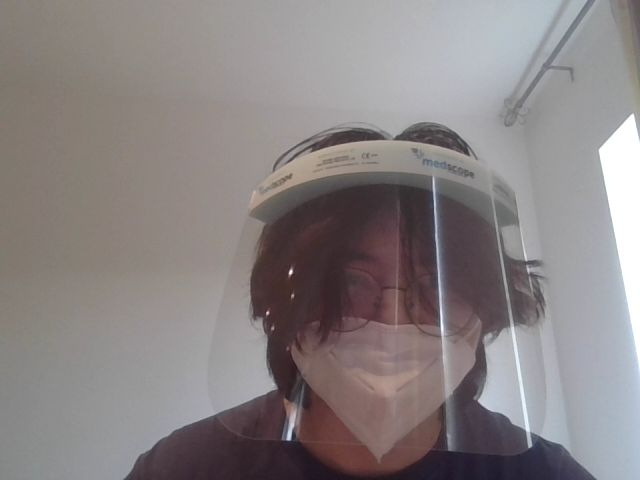

In [7]:
image = cv2.imread(image_file)
image = imutils.resize(image, width=640)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

In [8]:
cv2.imwrite('/content/test.jpg', image)

True

## Results save to runs/detect

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='/content/test.jpg', update=False, view_img=False, weights=['/content/visor.pt'])
YOLOv5 🚀 v5.0-76-g57b0d3a torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/test.jpg: 480x640 1 visor, Done. (0.011s)
Results saved to runs/detect/exp6
Done. (0.022s)


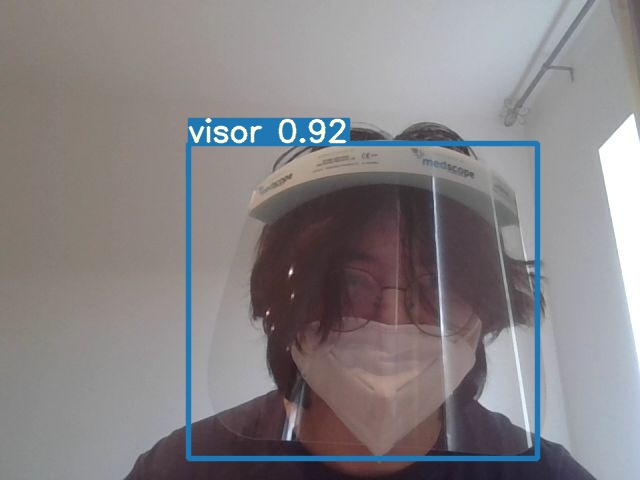

In [17]:
!python detect.py --weights /content/visor.pt --img 640 --conf 0.25 --source /content/test.jpg
Image(filename='/content/yolov5/runs/detect/exp/test.jpg', width=640)